# Factorial designs: principles and applications

## Choosing the right test: petrochemicals
In a chemistry research lab, scientists are examining the efficiency of three well-known catalysts—Palladium (Pd), Platinum (Pt), and Nickel (Ni)—in facilitating a particular reaction. Each catalyst is used in a set of identical reactions under controlled conditions, and the time taken for each reaction to reach completion is meticulously recorded. Your goal is to compare the mean reaction times across the three catalyst groups to identify which catalyst, if any, has a significantly different reaction time.

The data is available in the chemical_reactions DataFrame. pandas as pd, numpy as np, and the following functions have been loaded as well:



* What type of hypothesis test should be performed in this scenario?

**One-way ANOVA**

In [6]:
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency


# Separate the data by catalyst
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create sample data
n_samples = 1125  # Total number of samples
n_per_group = n_samples // 3  # Equal samples per catalyst

# Generate reaction times for each catalyst with different means
palladium_times = np.random.normal(loc=45.0, scale=5.0, size=n_per_group)
platinum_times = np.random.normal(loc=38.0, scale=4.5, size=n_per_group)
nickel_times = np.random.normal(loc=55.0, scale=6.0, size=n_per_group)

# Create the DataFrame
chemical_reactions = pd.DataFrame({
    'Catalyst': ['Palladium'] * n_per_group + ['Platinum'] * n_per_group + ['Nickel'] * n_per_group,
    'Reaction_Time': np.concatenate([palladium_times, platinum_times, nickel_times])
})

# Display the first few and last few rows
print("First 5 rows:")
print(chemical_reactions.head())
print("\nLast 5 rows:")
print(chemical_reactions.tail())
print(f"\nDataFrame shape: {chemical_reactions.shape}")
print(f"\nCatalyst counts:\n{chemical_reactions['Catalyst'].value_counts()}")

# Show some basic statistics
print("\nDescriptive statistics by catalyst:")
print(chemical_reactions.groupby('Catalyst')['Reaction_Time'].describe())

First 5 rows:
    Catalyst  Reaction_Time
0  Palladium      47.483571
1  Palladium      44.308678
2  Palladium      48.238443
3  Palladium      52.615149
4  Palladium      43.829233

Last 5 rows:
     Catalyst  Reaction_Time
1120   Nickel      61.633156
1121   Nickel      62.122182
1122   Nickel      58.832381
1123   Nickel      48.141971
1124   Nickel      64.800589

DataFrame shape: (1125, 2)

Catalyst counts:
Catalyst
Palladium    375
Platinum     375
Nickel       375
Name: count, dtype: int64

Descriptive statistics by catalyst:
           count       mean       std        min        25%        50%  \
Catalyst                                                                 
Nickel     375.0  55.938566  5.824867  37.622468  51.900000  56.119655   
Palladium  375.0  45.105022  4.737518  28.793663  41.758200  45.301151   
Platinum   375.0  37.744496  4.584806  25.864010  34.556135  37.749869   

                 75%        max  
Catalyst                         
Nickel     59.596340  

* Use a list comprehension to filter into groups iterating over the catalyst_types and each of their 'Reaction_Time's.

* Run a one-way ANOVA on the three groups to compare their mean reaction times and print the p-value.
* Assume a significance level of 0.01. What is the appropriate conclusion to glean from the P-value in comparison with this 
 value?

In [7]:
catalyst_types = ['Palladium', 'Platinum', 'Nickel']

# Collect reaction times for each catalyst into a list
groups = [chemical_reactions[chemical_reactions['Catalyst'] == catalyst]['Reaction_Time'] for catalyst in catalyst_types]

# Perform the one-way ANOVA across the three groups
f_stat, p_val = f_oneway(*groups)
print(f_stat, p_val)

1217.5600106508161 7.580948714391486e-282



**The P-value is substantially smaller than the  value, indicating a significant difference in reaction times across the catalysts.**

The extremely small P-value strongly suggests significant differences among the catalysts.

## Choosing the right test: human resources
In human resources, it's essential to understand the relationships between different variables that might influence employee satisfaction or turnover. Consider a scenario where an HR department is interested in understanding the association between the department in which employees work and their participation in a new workplace wellness program. The HR team has compiled this data over the past two years and has asked you if there's any significant association between an employee's department and their enrolling in the wellness program.

The data is available in the hr_wellness DataFrame. pandas as pd, numpy as np, and the following functions have been loaded:



* What type of hypothesis test should be performed in this scenario?

**Chi-square test of association**

In [8]:
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

In [9]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create sample data
n_samples = 1420
departments = ['Marketing', 'Sales', 'Engineering', 'HR', 'Operations']
statuses = ['Enrolled', 'Not Enrolled']

# Create probability distributions for each department
# Marketing: 40% enrollment rate
# Sales: 60% enrollment rate  
# Engineering: 30% enrollment rate
# HR: 70% enrollment rate
# Operations: 50% enrollment rate

hr_wellness = pd.DataFrame({
    'Department': np.random.choice(departments, size=n_samples, p=[0.25, 0.25, 0.20, 0.15, 0.15]),
    'Wellness_Program_Status': [''] * n_samples
})

# Assign enrollment status based on department probabilities
for i in range(len(hr_wellness)):
    dept = hr_wellness.loc[i, 'Department']
    if dept == 'Marketing':
        hr_wellness.loc[i, 'Wellness_Program_Status'] = np.random.choice(statuses, p=[0.4, 0.6])
    elif dept == 'Sales':
        hr_wellness.loc[i, 'Wellness_Program_Status'] = np.random.choice(statuses, p=[0.6, 0.4])
    elif dept == 'Engineering':
        hr_wellness.loc[i, 'Wellness_Program_Status'] = np.random.choice(statuses, p=[0.3, 0.7])
    elif dept == 'HR':
        hr_wellness.loc[i, 'Wellness_Program_Status'] = np.random.choice(statuses, p=[0.7, 0.3])
    else:  # Operations
        hr_wellness.loc[i, 'Wellness_Program_Status'] = np.random.choice(statuses, p=[0.5, 0.5])

print(hr_wellness)
print(f"\nDataFrame shape: {hr_wellness.shape}")

       Department Wellness_Program_Status
0           Sales                Enrolled
1      Operations            Not Enrolled
2              HR                Enrolled
3     Engineering                Enrolled
4       Marketing            Not Enrolled
...           ...                     ...
1415   Operations            Not Enrolled
1416    Marketing            Not Enrolled
1417    Marketing                Enrolled
1418        Sales            Not Enrolled
1419   Operations                Enrolled

[1420 rows x 2 columns]

DataFrame shape: (1420, 2)


In [10]:
# Create a contingency table
contingency_table = pd.crosstab(
  hr_wellness['Department'], 
  hr_wellness['Wellness_Program_Status']
)

# Perform the chi-square test of association
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(chi2_stat, p_val)

109.87317756542903 7.745306617174964e-23


* Assume a significance level of 0.05. Given the P-value, what is the appropriate conclusion?


**There's no significant association between department and enrollment in the wellness program, as the P-value is larger than 0.05.**

## Choosing the right test: finance
In the realm of finance, investment strategists are continually evaluating different approaches to maximize returns. Consider a scenario where a financial firm wishes to assess the effectiveness of two investment strategies: "Quantitative Analysis" and "Fundamental Analysis". The firm has applied each strategy to a separate set of investment portfolios for a year and now asks you to compare the annual returns to determine if there is any difference in strategy returns by comparing the mean returns of the two groups.

The data is available in the investment_returns DataFrame. pandas as pd, numpy as np, and the following functions have been loaded as well:

* What type of hypothesis test should be performed in this scenario?

**Independent samples t-test**

In [11]:
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

In [12]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create sample data
n_samples = 500  # Total number of portfolios

# Generate returns for each strategy with different means
# Quantitative Analysis: higher mean returns, moderate volatility
quant_returns = np.random.normal(loc=12.5, scale=3.5, size=n_samples//2)

# Fundamental Analysis: slightly lower mean returns, lower volatility  
fundamental_returns = np.random.normal(loc=10.8, scale=2.8, size=n_samples//2)

# Create the DataFrame
investment_returns = pd.DataFrame({
    'Strategy_Type': ['Quantitative'] * (n_samples//2) + ['Fundamental'] * (n_samples//2),
    'Annual_Return': np.concatenate([quant_returns, fundamental_returns])
})

print(investment_returns)
print(f"\nDataFrame shape: {investment_returns.shape}")
print(f"\nStrategy counts:\n{investment_returns['Strategy_Type'].value_counts()}")
print(f"\nDescriptive statistics by strategy:")
print(investment_returns.groupby('Strategy_Type')['Annual_Return'].describe())

    Strategy_Type  Annual_Return
0    Quantitative      14.238500
1    Quantitative      12.016075
2    Quantitative      14.766910
3    Quantitative      17.830604
4    Quantitative      11.680463
..            ...            ...
495   Fundamental      12.308948
496   Fundamental       7.895711
497   Fundamental      10.267052
498   Fundamental       8.348269
499   Fundamental       6.928161

[500 rows x 2 columns]

DataFrame shape: (500, 2)

Strategy counts:
Strategy_Type
Quantitative    250
Fundamental     250
Name: count, dtype: int64

Descriptive statistics by strategy:
               count       mean       std       min        25%        50%  \
Strategy_Type                                                               
Fundamental    250.0  10.845077  2.794606  1.724451   8.824086  10.796179   
Quantitative   250.0  12.491520  3.381188  3.330892  10.122628  12.707268   

                     75%        max  
Strategy_Type                        
Fundamental    12.700872  19.4208

In [13]:
# Separate the annual returns by strategy type
quantitative_returns = investment_returns[investment_returns['Strategy_Type'] == 'Quantitative']['Annual_Return']
fundamental_returns = investment_returns[investment_returns['Strategy_Type'] == 'Fundamental']['Annual_Return']

# Perform the independent samples t-test between the two groups
t_stat, p_val = ttest_ind(quantitative_returns, fundamental_returns)
print(t_stat, p_val)

5.934562571040242 5.524012590628419e-09



**The P-value is much smaller than , suggesting a significant difference in returns between the two strategies.**


# Post-hoc analysis following ANOVA

## Anxiety treatments ANOVA
Psychologists conducted a study to compare the effectiveness of three types of therapy on reducing anxiety levels: Cognitive Behavioral Therapy (CBT), Dialectical Behavior Therapy (DBT), and Acceptance and Commitment Therapy (ACT). Participants were randomly assigned to one of the three therapy groups, and their anxiety levels were measured before and after the therapy sessions. The psychologists have asked you to determine if there are any significant differences in the effectiveness of these therapies.

The therapy_outcomes DataFrame containing this experiment data has been loaded along with pandas as pd and from scipy.stats import f_oneway.


* Create a pivot table to calculate the mean 'Anxiety_Reduction' value across groups of 'Therapy_Type' in this data.
* Filter groups of therapy types and their 'Anxiety_Reduction' values by first creating a list of the three therapy types: 'CBT', 'DBT', and 'ACT'.
* Perform a one-way ANOVA.


In [14]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create sample data
n_samples = 180  # Total number of participants (60 per therapy type)

# Generate anxiety reduction scores for each therapy type with different means
# CBT: Most effective, highest mean reduction
cbt_reduction = np.random.normal(loc=25.5, scale=4.0, size=n_samples//3)

# DBT: Moderately effective, medium mean reduction  
dbt_reduction = np.random.normal(loc=20.8, scale=3.8, size=n_samples//3)

# ACT: Least effective, lowest mean reduction
act_reduction = np.random.normal(loc=18.2, scale=4.2, size=n_samples//3)

# Create the DataFrame
therapy_outcomes = pd.DataFrame({
    'Therapy_Type': ['CBT'] * (n_samples//3) + ['DBT'] * (n_samples//3) + ['ACT'] * (n_samples//3),
    'Anxiety_Reduction': np.concatenate([cbt_reduction, dbt_reduction, act_reduction])
})

print(therapy_outcomes)
print(f"\nDataFrame shape: {therapy_outcomes.shape}")
print(f"\nTherapy type counts:\n{therapy_outcomes['Therapy_Type'].value_counts()}")
print(f"\nDescriptive statistics by therapy type:")
print(therapy_outcomes.groupby('Therapy_Type')['Anxiety_Reduction'].describe())

    Therapy_Type  Anxiety_Reduction
0            CBT          27.486857
1            CBT          24.946943
2            CBT          28.090754
3            CBT          31.592119
4            CBT          24.563387
..           ...                ...
175          ACT          21.674170
176          ACT          18.254608
177          ACT          24.304843
178          ACT          17.088441
179          ACT          29.624710

[180 rows x 2 columns]

DataFrame shape: (180, 2)

Therapy type counts:
Therapy_Type
CBT    60
DBT    60
ACT    60
Name: count, dtype: int64

Descriptive statistics by therapy type:
              count       mean       std        min        25%        50%  \
Therapy_Type                                                                
ACT            60.0  18.586040  4.183633  11.448570  14.876151  19.165399   
CBT            60.0  24.881381  3.634084  17.661320  22.749390  24.580173   
DBT            60.0  20.786003  3.584780  10.844969  18.957684  20.683671   


In [15]:
# Pivot to view the mean anxiety reduction for each therapy
pivot_table = therapy_outcomes.pivot_table(
    values='Anxiety_Reduction', 
    index='Therapy_Type', 
    aggfunc="mean")
print(pivot_table)


              Anxiety_Reduction
Therapy_Type                   
ACT                   18.586040
CBT                   24.881381
DBT                   20.786003


In [16]:
# Create groups to prepare the data for ANOVA
therapy_types = ['CBT', 'DBT', 'ACT']
groups = [therapy_outcomes[therapy_outcomes['Therapy_Type'] == therapy]['Anxiety_Reduction'] for therapy in therapy_types]

# Conduct ANOVA
f_stat, p_val = f_oneway(*groups)
print(p_val)

1.0480790483866144e-15


Great job! By analyzing the data with ANOVA, you've taken an important step in comparing the effectiveness of different therapies. Assuming an alpha of 0.05, the P-value indicates significant differences in therapy effectiveness.

## Applying Tukey's HSD
Following the ANOVA analysis which suggested significant differences in the effectiveness of the three types of therapy, the psychologists are keen to delve deeper. They wish for you to explain exactly which therapy types differ from each other in terms of reducing anxiety levels. This is where Tukey's Honest Significant Difference (HSD) test comes into play. It's a post-hoc test used to make pairwise comparisons between group means after an ANOVA has shown a significant difference. Tukey's HSD test helps in identifying specific pairs of groups that have significant differences in their means.

The therapy_outcomes DataFrame containing this experiment data has again been loaded along with pandas as pd and from statsmodels.stats.multicomp import pairwise_tukeyhsd.

* At a significance level of 0.05, perform Tukey's HSD test to compare the mean anxiety reduction across the three therapy groups.

In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(
    therapy_outcomes['Anxiety_Reduction'], 
    therapy_outcomes['Therapy_Type'], 
    alpha=0.05
)

print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   ACT    CBT   6.2953    0.0   4.651 7.9397   True
   ACT    DBT      2.2 0.0052  0.5556 3.8443   True
   CBT    DBT  -4.0954    0.0 -5.7397 -2.451   True
---------------------------------------------------


 The Tukey HSD test provided clear insights into which therapy types significantly differ in reducing anxiety. These findings can guide psychologists in refining treatment approaches. Did you catch that ACT and CBT don't differ significantly from this experiment?

## Applying Bonferoni correction
After identifying significant differences between therapy groups with Tukey's HSD, we want to confirm our findings with the Bonferroni correction. The Bonferroni correction is a conservative statistical adjustment used to counteract the problem of multiple comparisons. It reduces the chance of obtaining false-positive results by adjusting the significance level. In the context of your study on the effectiveness of CBT, DBT, and ACT, applying the Bonferroni correction will help ensure that the significant differences you observe between therapy groups are not due to chance.



* Conduct independent t-tests between all pairs of therapy groups in therapy_pairs and append the p-values (p_val) to the p_values list.
* Apply the Bonferroni correction to adjust the p-values from the multiple tests and print them.




In [21]:
from scipy.stats import ttest_ind 
from statsmodels.sandbox.stats.multicomp import multipletests

p_values = []

therapy_pairs = [('CBT', 'DBT'), ('CBT', 'ACT'), ('DBT', 'ACT')]

# Conduct t-tests and collect P-values
for pair in therapy_pairs:
    group1 = therapy_outcomes[therapy_outcomes['Therapy_Type'] == pair[0]]['Anxiety_Reduction']
    group2 = therapy_outcomes[therapy_outcomes['Therapy_Type'] == pair[1]]['Anxiety_Reduction']
    t_stat, p_val = ttest_ind(group1, group2)
    p_values.append(p_val)

# Apply Bonferroni correction
print(multipletests(p_values, alpha=0.05, method='bonferroni')[1])

[2.40350973e-08 4.07578278e-14 7.41981379e-03]


Well done! You've adeptly applied the Bonferroni correction to adjust the P-values for multiple comparisons. This step is critical to control for Type I error, ensuring the reliability of your findings. Here, you again see that ACT and CBT don't differ significantly from this experiment due to the corrected P-value of 1.

# p-values, alpha and errors

## Analyzing toy durability
In product development within the toy industry, it's crucial to understand the durability of toys, particularly when comparing educational toys to recreational ones. Durability can significantly impact customer satisfaction and repeat business. Researchers in a toy manufacturing company have asked you to conduct the analysis of a study comparing the durability of educational toys versus recreational toys. The toy_durability DataFrame contains the results of these tests, with durability scores assigned based on rigorous testing protocols.



Calculate the mean 'Durability_Score' for both 'Educational' and 'Recreational' toys using a pivot table.
Perform an independent samples t-test to compare the durability of 'Educational' and 'Recreational' toys by first separating durability scores by Toy_Type.

In [24]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create sample data
n_samples = 200  # Total number of toys (100 per type)

# Generate durability scores for each toy type with different means
# Educational toys: Higher durability (more robust construction)
educational_scores = np.random.normal(loc=85.0, scale=8.0, size=n_samples//2)

# Recreational toys: Lower durability (more focus on fun features)
recreational_scores = np.random.normal(loc=72.5, scale=9.5, size=n_samples//2)

# Create the DataFrame
toy_durability = pd.DataFrame({
    'Toy_Type': ['Educational'] * (n_samples//2) + ['Recreational'] * (n_samples//2),
    'Durability_Score': np.concatenate([educational_scores, recreational_scores])
})

print(toy_durability)
print(f"\nDataFrame shape: {toy_durability.shape}")
print(f"\nToy type counts:\n{toy_durability['Toy_Type'].value_counts()}")
print(f"\nDescriptive statistics by toy type:")
# print(toy_durability.groupby('Toy_Type')['Durability_Score'].describe()")

         Toy_Type  Durability_Score
0     Educational         88.973713
1     Educational         83.893886
2     Educational         90.181508
3     Educational         97.184239
4     Educational         83.126773
..            ...               ...
195  Recreational         76.160515
196  Recreational         64.103354
197  Recreational         73.960389
198  Recreational         73.052983
199  Recreational         61.641782

[200 rows x 2 columns]

DataFrame shape: (200, 2)

Toy type counts:
Toy_Type
Educational     100
Recreational    100
Name: count, dtype: int64

Descriptive statistics by toy type:


In [25]:
from scipy.stats import ttest_ind

# Calculate mean Durability_Score for each Toy_Type
mean_durability = toy_durability.pivot_table(
  values='Durability_Score', index='Toy_Type', aggfunc="mean")
print(mean_durability)

# Perform t-test
educational_durability = toy_durability[toy_durability['Toy_Type'] == 'Educational']['Durability_Score']
recreational_durability = toy_durability[toy_durability['Toy_Type'] == 'Recreational']['Durability_Score']
t_stat, p_val = ttest_ind(educational_durability, recreational_durability)

print(p_val)

              Durability_Score
Toy_Type                      
Educational          84.169228
Recreational         72.711894
6.28951494141757e-19


! The P-value suggests that there's a statistically significant difference in durability between 'Educational' and 'Recreational' toys, assuming an alpha of 0.05. This insight could be crucial for product development and marketing strategies.

## Visualizing durability differences
Following the analysis of toy durability, the research team is interested in you visualizing the distribution of durability scores for both Educational and Recreational toys. Such visualizations can offer intuitive insights into the data, potentially highlighting the range and variability of scores within each category. This step is essential for presenting findings to non-technical stakeholders and guiding further product development decisions.


* Visualize the distribution of 'Durability_Score' for Educational and Recreational toys using a Kernel Density Estimate (KDE) plot, highlighting differences by using the 'Toy_Type' column to color the distributions differently.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

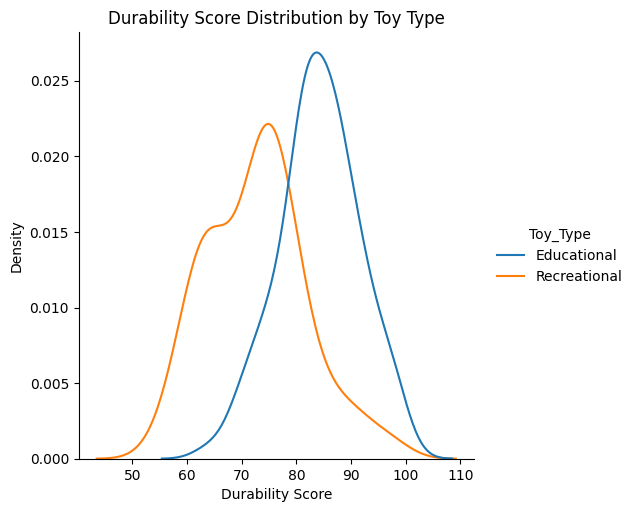

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of Durability_Score for each Toy_Type
sns.displot(data=toy_durability, x="Durability_Score", 
         hue="Toy_Type", kind="kde")
plt.title('Durability Score Distribution by Toy Type')
plt.xlabel('Durability Score')
plt.ylabel('Density')
plt.show()

 The KDE plot visually illustrates the differences in durability between Educational and Recreational toys. You can see that the center of both distributions is near 80 for the durability score, but Recreational seems more variable than Educational.

# Power analysis: sample and effect size

## Estimating required sample size for energy study
In the energy sector, researchers are often tasked with evaluating the effectiveness of new technologies or initiatives to enhance energy efficiency or reduce consumption. A study is being designed to compare the impact of two energy-saving measures: "Smart Thermostats" and "LED Lighting". To ensure the study has sufficient power to detect a meaningful difference in energy savings between these two measures, you'll conduct a power analysis.



* Instantiate a TTestIndPower object.
* Conduct the power analysis to estimate the required sample size for each group (Smart Thermostats and LED Lighting) to achieve a power of 0.9, assuming a moderate effect size (Cohen's d = 0.5) and an alpha of 0.05 with an equal sized groups.




In [ ]:
from statsmodels.stats.power import TTestIndPower

# Instantiate a TTestIndPower object
power_analysis = TTestIndPower()

# Conduct a power analysis to determine the required sample size
required_n = power_analysis.solve_power(
    effect_size=0.5, 
    alpha=0.05, 
    power=0.9, 
    ratio=1)

print(required_n)

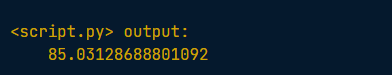